In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
df =pd.read_csv("uber.csv")

In [19]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
Unnamed: 0           200000 non-null int64
key                  200000 non-null object
fare_amount          200000 non-null float64
pickup_datetime      200000 non-null object
pickup_longitude     200000 non-null float64
pickup_latitude      200000 non-null float64
dropoff_longitude    199999 non-null float64
dropoff_latitude     199999 non-null float64
passenger_count      200000 non-null int64
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [21]:
df = df.drop("pickup_datetime", axis=1)
df = df.drop(["Unnamed: 0", "key"], axis=1)

In [10]:
df.isnull().sum()


Unnamed: 0           0
key                  0
fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [22]:
df['dropoff_longitude'].fillna(value=df["dropoff_longitude"].mean(), inplace=True)
df['dropoff_latitude'].fillna(value=df["dropoff_latitude"].mean(), inplace=True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 6 columns):
fare_amount          200000 non-null float64
pickup_longitude     200000 non-null float64
pickup_latitude      200000 non-null float64
dropoff_longitude    200000 non-null float64
dropoff_latitude     200000 non-null float64
passenger_count      200000 non-null int64
dtypes: float64(5), int64(1)
memory usage: 9.2 MB


In [24]:
df.isnull().sum()

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

fare_amount             AxesSubplot(0.125,0.787927;0.352273x0.0920732)
pickup_longitude     AxesSubplot(0.547727,0.787927;0.352273x0.0920732)
pickup_latitude         AxesSubplot(0.125,0.677439;0.352273x0.0920732)
dropoff_longitude    AxesSubplot(0.547727,0.677439;0.352273x0.0920732)
dropoff_latitude        AxesSubplot(0.125,0.566951;0.352273x0.0920732)
passenger_count      AxesSubplot(0.547727,0.566951;0.352273x0.0920732)
dtype: object

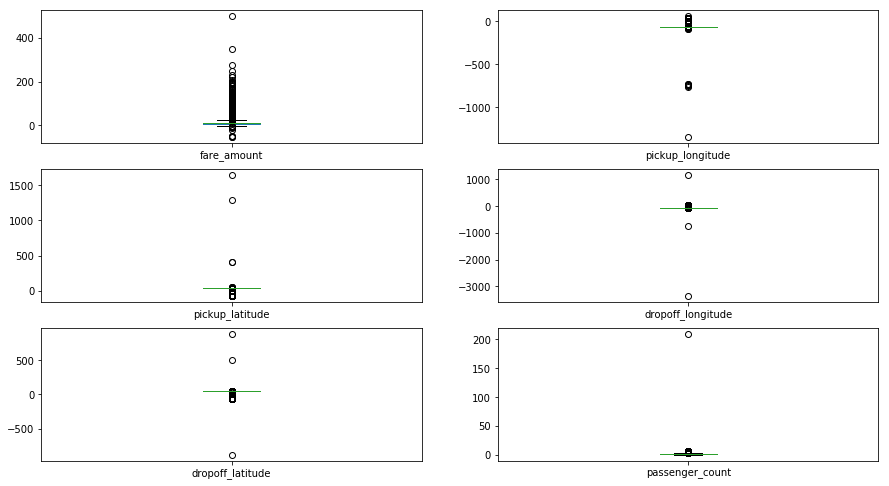

In [27]:
df.plot(kind="box", subplots=True, layout=(7, 2), figsize=(15, 20))

In [28]:
def remove_outlier(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    df[col] = np.clip(df[col], lower_bound, upper_bound)
    return df

In [29]:
def treat_outliers_all(df, cols):
    for col in cols:
        df = remove_outlier(df, col)
    
    return df

In [32]:
df = treat_outliers_all(df, df.columns.to_list())

fare_amount             AxesSubplot(0.125,0.787927;0.352273x0.0920732)
pickup_longitude     AxesSubplot(0.547727,0.787927;0.352273x0.0920732)
pickup_latitude         AxesSubplot(0.125,0.677439;0.352273x0.0920732)
dropoff_longitude    AxesSubplot(0.547727,0.677439;0.352273x0.0920732)
dropoff_latitude        AxesSubplot(0.125,0.566951;0.352273x0.0920732)
passenger_count      AxesSubplot(0.547727,0.566951;0.352273x0.0920732)
dtype: object

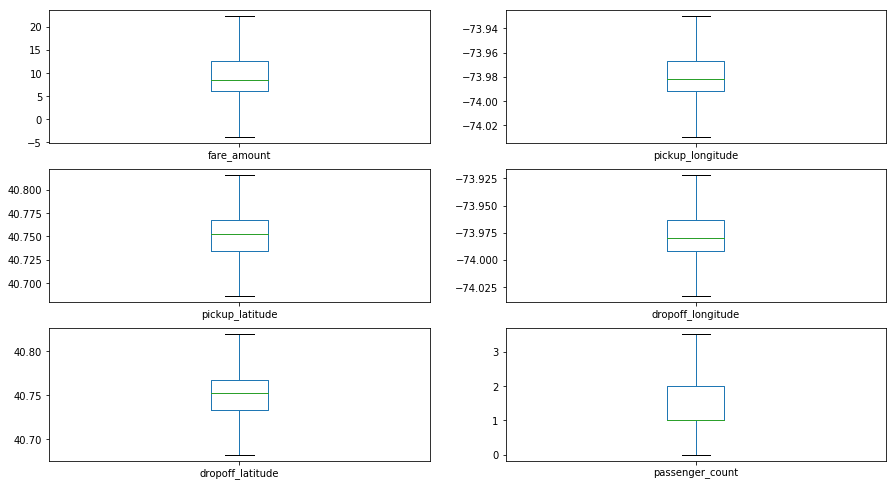

In [33]:
df.plot(kind="box", subplots=True, layout=(7, 2), figsize=(15, 20))

In [34]:
df.corr()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
fare_amount,1.000000,0.154069,-0.110842,0.218704,-0.125898,0.015778
pickup_longitude,0.154069,1.000000,0.259497,0.425631,0.073290,-0.013213
pickup_latitude,-0.110842,0.259497,1.000000,0.048898,0.515714,-0.012889
dropoff_longitude,0.218704,0.425631,0.048898,1.000000,0.245627,-0.009325
dropoff_latitude,-0.125898,0.073290,0.515714,0.245627,1.000000,-0.006308
passenger_count,0.015778,-0.013213,-0.012889,-0.009325,-0.006308,1.000000


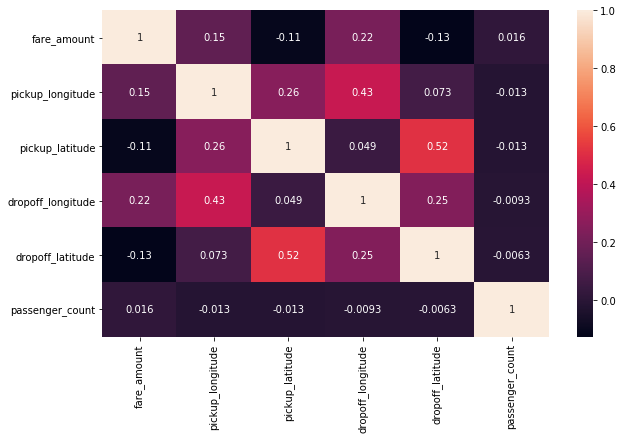

In [36]:
fig, axis = plt.subplots(figsize = (10, 6))
sns.heatmap(df.corr(), annot = True)

In [37]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [40]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [41]:
regression.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [42]:
regression.intercept_

-52.971252039146435

In [43]:
prediction = regression.predict(x_test)

In [44]:
prediction

array([1.50874239, 1.51828065, 1.55594373, ..., 1.51220065, 1.51304746,
       1.53133415])

In [45]:
y_test

array([1., 2., 1., ..., 1., 1., 1.])

In [46]:
from sklearn.metrics import r2_score

r2_score(y_test, prediction)

0.00045689574206708716

In [47]:
from sklearn.metrics import mean_squared_error


In [48]:
mse = mean_squared_error(y_test, prediction)

In [49]:
mse

0.764746383625268

In [50]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100)

In [51]:
rf.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [52]:
y_pred = rf.predict(x_test)

In [53]:
y_pred

array([1.705, 1.435, 1.615, ..., 1.8  , 1.755, 1.595])

In [54]:
r2_score(y_test, y_pred)

-0.057470146320266036